In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats

In [61]:
train_data_pri = pd.read_csv('./data/private_train.csv')
test_data_pri = pd.read_csv('./data/private_test.csv')

In [26]:
train_data_pri = train_data_pri.drop(['index'],axis=1)
test_data_pri = test_data_pri.drop(['index'],axis=1)
print train_data_pri.shape
print test_data_pri.shape
print "List of Columns:\n", ", ".join(train_data_pri.columns), "\n\n"
print "List of Columns:\n", ", ".join(test_data_pri.columns), "\n\n"

(457300, 20)
(4033, 19)
List of Columns:
project_name, address, floor_area_sqm, type_of_land, price, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 


List of Columns:
project_name, address, floor_area_sqm, type_of_land, contract_date, property_type, tenure, completion_date, type_of_sale, postal_district, postal_sector, postal_code, region, area, month, latitude, longitude, floor_num, unit_num 




In [36]:
test_data_pri[test_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Series([], Name: completion_date, dtype: int64)

In [38]:
train_data_pri[train_data_pri['completion_date'] == 'Uncompleted'].completion_date.value_counts()

Uncompleted    154395
Name: completion_date, dtype: int64

In [37]:
test_data_pri.completion_date.unique()

array(['2014', '1995', '1979', '2015', '2016', '1992', '1998', '1986',
       '2011', '2010', '2000', '2012', '2001', '1999', '1968', '2004',
       '2006', 'Unknown', '2005', '2009', '1975', '2013', '1996', '1997',
       '1991', '1994', '2002', '1982', '2008', '2007', '1987', '1978',
       '1983', '1984', '1972', '1990', '1993', '1971', '2003', '1969',
       '1985', '1989', '2017', '1980', '1976', '1956', '1988', '1967',
       '1958', '1957', '1955', '1977', '1960', '1966', '1965', '1961',
       '1974', '1953', '1941', '1970', '1981', '1950', '1963', '1962'], dtype=object)

In [39]:
test_data_pri.type_of_land.unique()

array(['Strata', 'Land'], dtype=object)

In [40]:
train_data_pri.type_of_land.unique()

array(['Strata', 'Land', 'Unknown'], dtype=object)

In [41]:
test_data_pri[test_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Series([], Name: type_of_land, dtype: int64)

In [42]:
train_data_pri[train_data_pri['type_of_land'] == 'Unknown'].type_of_land.value_counts()

Unknown    928
Name: type_of_land, dtype: int64

In [43]:
train_data_pri.contract_date.unique()

array(['01-Jan-2010', '02-Jan-2010', '03-Jan-2010', ..., '3-Aug-2017',
       '2-Aug-2017', '1-Aug-2017'], dtype=object)

In [44]:
test_data_pri.contract_date.unique()

array(['29-Sep-2017', '28-Sep-2017', '27-Sep-2017', '26-Sep-2017',
       '25-Sep-2017', '22-Sep-2017', '21-Sep-2017', '20-Sep-2017',
       '19-Sep-2017', '18-Sep-2017', '15-Sep-2017', '14-Sep-2017',
       '13-Sep-2017', '12-Sep-2017', '11-Sep-2017', '8-Sep-2017',
       '7-Sep-2017', '6-Sep-2017', '5-Sep-2017', '4-Sep-2017',
       '08-SEP-2017', '07-SEP-2017', '06-SEP-2017', '05-SEP-2017',
       '04-SEP-2017', '22-SEP-2017', '21-SEP-2017', '20-SEP-2017',
       '19-SEP-2017', '18-SEP-2017', '15-SEP-2017', '14-SEP-2017',
       '13-SEP-2017', '12-SEP-2017', '11-SEP-2017', '09-SEP-2017',
       '05-OCT-2017', '04-OCT-2017', '03-OCT-2017', '02-OCT-2017',
       '29-SEP-2017', '28-SEP-2017', '27-SEP-2017', '26-SEP-2017',
       '25-SEP-2017', '23-SEP-2017', '19-OCT-2017', '18-OCT-2017',
       '17-OCT-2017', '16-OCT-2017', '13-OCT-2017', '12-OCT-2017',
       '11-OCT-2017', '10-OCT-2017', '09-OCT-2017', '06-OCT-2017',
       '01-NOV-2017', '31-OCT-2017', '30-OCT-2017', '29-OCT-2017',


In [59]:
train_data_pri.month.unique()

array(['2010-1', '2010-2', '2010-3', '2010-4', '2010-5', '2010-6',
       '2010-7', '2010-8', '2010-9', '2010-10', '2010-11', '2010-12',
       '2011-1', '2011-2', '2011-3', '2011-4', '2011-5', '2011-6',
       '2011-7', '2011-8', '2011-9', '2011-10', '2011-11', '2011-12',
       '2012-1', '2012-2', '2012-3', '2012-4', '2012-5', '2012-6',
       '2012-7', '2012-8', '2012-9', '2012-10', '2012-11', '2012-12',
       '2013-1', '2013-2', '2013-3', '2013-4', '2013-5', '2013-6',
       '2013-7', '2013-8', '2013-9', '2013-10', '2013-11', '2013-12',
       '2014-1', '2014-2', '2014-3', '2014-4', '2014-5', '2014-6',
       '2014-7', '2014-8', '2014-9', '2014-10', '2014-11', '2014-12',
       '2015-1', '2015-2', '2015-3', '2015-4', '2015-5', '2015-6',
       '2015-7', '2015-8', '2015-9', '2015-10', '2015-11', '2015-12',
       '2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',
       '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12',
       '2017-1', '2017-2', '2017-3', '201

In [45]:
train_data_pri.property_type.unique()

array(['Condominium', 'Semi-Detached House', 'Apartment',
       'Executive Condominium', 'Terrace House', 'Detached House'], dtype=object)

In [46]:
test_data_pri.property_type.unique()

array(['Condominium', 'Apartment', 'Terrace House', 'Semi-Detached House',
       'Detached House', 'Executive Condominium'], dtype=object)

In [47]:
train_data_pri.tenure.unique()

array(['99 Yrs From 25/02/1998', '103 Yrs From 18/08/2009',
       '99 Yrs From 16/08/1999', 'Freehold', '99 Yrs From 18/11/1991',
       '99 Yrs From 01/09/1991', '99 Yrs From 25/03/1968',
       '99 Yrs From 14/11/1996', '99 Yrs From 29/01/2002',
       '999 Yrs From 12/10/1885', '99 Yrs From 22/09/1997',
       '99 Yrs From 29/11/2000', '999 Yrs From 01/06/1885',
       '99 Yrs From 17/03/1997', '99 Yrs From 24/04/1996',
       '99 Yrs From 12/08/2002', '929 Yrs From 01/01/1953',
       '9999 Yrs From 01/01/1957', '99 Yrs From 12/09/2000',
       '99 Yrs From 20/06/2000', '999 Yrs From 01/09/1876',
       '99 Yrs From 17/08/1979', '99 Yrs From 12/08/1996',
       '99 Yrs From 08/03/2007', '99 Yrs From 30/08/1976',
       '999 Yrs From 01/01/1879', '99 Yrs From 31/12/2007',
       '99 Yrs From 18/07/1997', '99 Yrs From 31/05/1993',
       '99 Yrs From 06/12/1997', '99 Yrs From 23/06/1995',
       '99 Yrs From 11/09/2007', '99 Yrs From 01/03/1995',
       '99 Yrs From 01/12/1991', '99

In [48]:
test_data_pri.tenure.unique()

array(['99 Yrs From 08/04/2010', 'Freehold', '99 Yrs From 20/10/2010',
       '999 Yrs From 21/06/1877', '99 Yrs From 01/03/1991',
       '999 Yrs From 01/01/1954', '99 Yrs From 07/12/2011',
       '99 Yrs From 26/06/1996', '99 Yrs From 17/03/1982',
       '99 Yrs From 10/09/2007', '99 Yrs From 12/08/1996',
       '99 Yrs From 24/06/1995', '99 Yrs From 24/04/1996',
       '99 Yrs From 26/02/2007', '99 Yrs From 31/12/2007',
       '99 Yrs From 16/08/1999', '99 Yrs From 15/03/2006',
       '99 Yrs From 20/01/2004', '99 Yrs From 07/01/2008',
       '99 Yrs From 10/08/2011', '999 Yrs From 01/05/1874',
       '99 Yrs From 07/06/2011', '99 Yrs From 06/01/2010',
       '99 Yrs From 08/03/1982', '99 Yrs From 16/06/2010',
       '99 Yrs From 20/10/1993', '99 Yrs From 17/03/1997',
       '99 Yrs From 11/07/2011', '103 Yrs From 18/08/2009',
       '99 Yrs From 11/12/2007', '99 Yrs From 30/05/2011',
       '999 Yrs From 01/01/1955', '99 Yrs From 16/02/1998',
       '99 Yrs From 21/06/2001', '99 Yr

In [49]:
train_data_pri.type_of_sale.unique()

array(['Resale', 'New Sale', 'Sub Sale'], dtype=object)

In [50]:
test_data_pri.type_of_sale.unique()

array(['Resale'], dtype=object)

In [52]:
train_data_pri.groupby(['type_of_sale'])['price'].count()

type_of_sale
New Sale    216274
Resale      204797
Sub Sale     36229
Name: price, dtype: int64

In [53]:
train_data_pri.postal_district.unique()

array([27, 15,  4, 19, 21, 16, 11,  1, 18, 12,  2,  8, 20, 23, 25, 10, 17,
        9, 28,  5, 14,  3, 22, 26, 13,  7,  6])

In [55]:
train_data_pri.postal_sector.unique()

array([75, 43,  9, 55, 59, 76, 46, 30,  5, 52, 32,  7, 20, 42, 57, 21, 66,
       73, 25, 50, 53,  1, 23, 27, 65, 54, 68, 80, 58, 12, 41, 16, 24, 48,
       39, 64, 60, 51, 26, 44, 78, 47, 67, 14, 35, 79, 15, 10, 45, 28, 40,
       38, 11, 13,  8, 56, 36, 31, 22, 29, 34,  6, 19, 77, 82, 18, 61, 17,
       63, 33, 49, 37,  4])

In [56]:
train_data_pri.postal_code.unique()

array([759151, 439893,  98656, ..., 466793, 266178, 266180])

In [57]:
train_data_pri.region.unique()

array(['North Region', 'Central Region', 'North East Region',
       'East Region', 'West Region'], dtype=object)

/home/naval_kumar99/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/naval_kumar99/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/naval_kumar99/anaconda3/envs/py27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


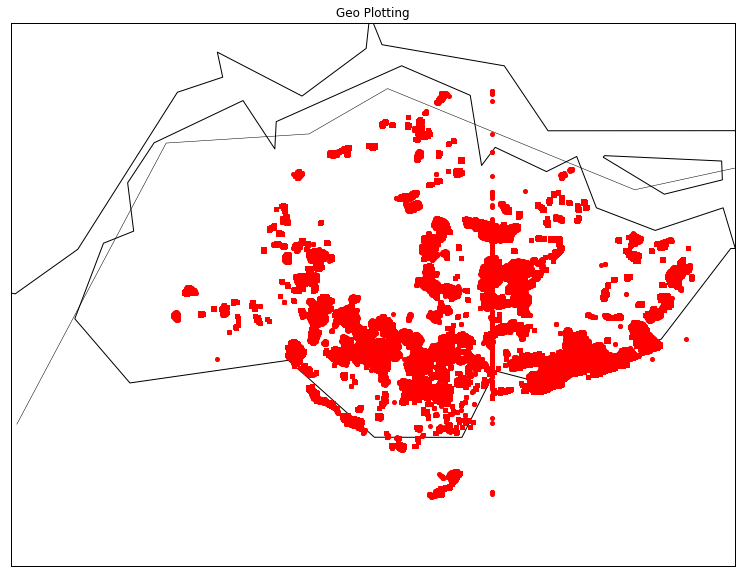

In [5]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
latlong = train_data_pri[cols]

#latlong = latlong.drop(latlong[(latlong.latitude>1.4) & (latlong.latitude<1.6) & (latlong.longitude>103.6) & (latlong.longitude<103.72)].index)
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
#m = Basemap(projection='merc',llcrnrlat=1.4,urcrnrlat=1.6,
 #           llcrnrlon=103.6, urcrnrlon=103.72, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,\
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=10, lat_0=1.5, lon_0=103)
 
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = latlong['longitude'].values
lats = latlong['latitude'].values
x,y = m(lons, lats)
#x,y=m([103.714098,103.714216],[1.348241,1.347004])

 

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

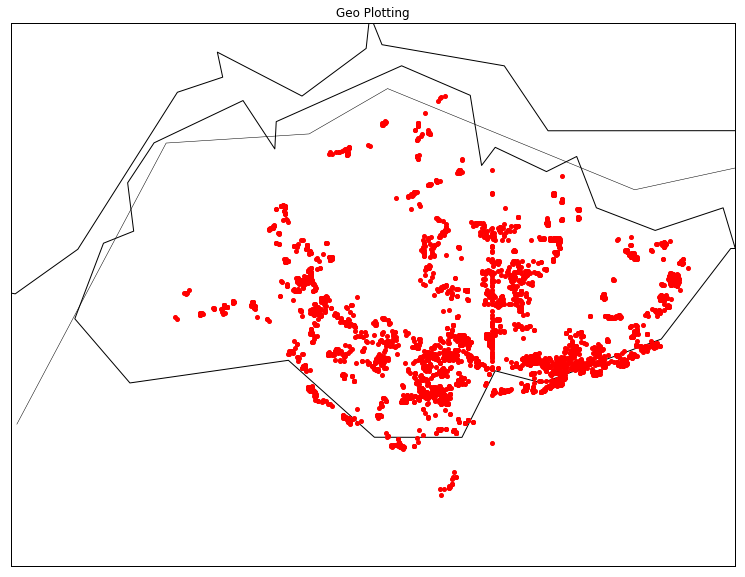

In [6]:
from mpl_toolkits.basemap import Basemap
cols = ['latitude','longitude']
#latlong = train_data_hdb[cols]
fig = plt.figure(figsize=(20, 10))
#m = Basemap(projection='mill',llcrnrlat=20,urcrnrlat=50,\
                #llcrnrlon=100,urcrnrlon=150,resolution='c')
m = Basemap(projection='merc',llcrnrlat=1.2,urcrnrlat=1.5,
            llcrnrlon=103.6, urcrnrlon=104, resolution='i', area_thresh=100, lat_0=1.5, lon_0=103)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
#m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lons = test_data_pri['longitude'].values
lats = test_data_pri['latitude'].values
x,y = m(lons, lats)

# r = red; o = circle marker (see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)
m.plot(x, y, 'ro', markersize=4)


    
plt.title("Geo Plotting")
plt.show()

/home/naval_kumar99/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 1328444.13 and sigma = 1505682.41



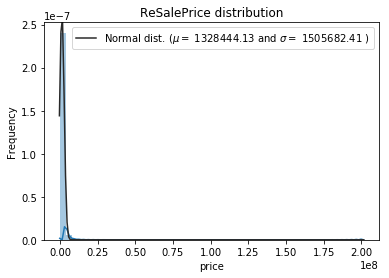

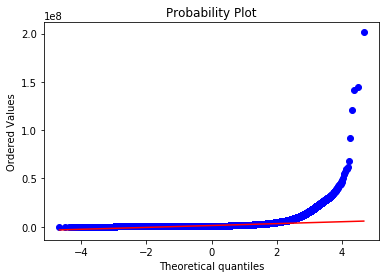

Skewness: 18.042802
Kurtosis: 1275.152772


In [7]:
sns.distplot(train_data_pri['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_data_pri['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('ReSalePrice distribution')

fig = plt.figure()
res = stats.probplot(train_data_pri['price'], plot=plt)
plt.show()

print("Skewness: %f" % train_data_pri['price'].skew())
print("Kurtosis: %f" % train_data_pri['price'].kurt())

In [8]:
train_data_pri['price'].describe()

count    4.573000e+05
mean     1.328444e+06
std      1.505684e+06
min      1.200000e+01
25%      7.150000e+05
50%      9.600000e+05
75%      1.420000e+06
max      2.013394e+08
Name: price, dtype: float64

In [27]:
ntrain = train_data_pri.shape[0]
ntest = test_data_pri.shape[0]
y_train = train_data_pri.price.values
all_data = pd.concat((train_data_pri, test_data_pri)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (461333, 19)


In [28]:
all_data.head()

,address,area,completion_date,contract_date,floor_area_sqm,floor_num,latitude,longitude,month,postal_code,postal_district,postal_sector,project_name,property_type,region,tenure,type_of_land,type_of_sale,unit_num
0,5 Jalan Mata Ayer #01-25,Mandai,2001,01-Jan-2010,95,1.0,1.424622,103.824894,2010-1,759151,27,75,EUPHONY GARDENS,Condominium,North Region,99 Yrs From 25/02/1998,Strata,Resale,25.0
1,81 Amber Road #16-06,Marine Parade,Uncompleted,01-Jan-2010,83,16.0,1.302808,103.900986,2010-1,439893,15,43,THE SHORE RESIDENCES,Condominium,Central Region,103 Yrs From 18/08/2009,Strata,New Sale,6.0
2,42 Keppel Bay Drive #01-111,Bukit Merah,2004,02-Jan-2010,138,1.0,1.266812,103.814504,2010-1,98656,4,9,CARIBBEAN AT KEPPEL BAY,Condominium,Central Region,99 Yrs From 16/08/1999,Strata,Resale,111.0
3,9 Amber Gardens #19-23,Marine Parade,Uncompleted,02-Jan-2010,89,19.0,1.301490,103.898675,2010-1,439958,15,43,ONE AMBER,Condominium,Central Region,Freehold,Strata,Sub Sale,23.0
4,118 Serangoon Avenue 3 #07-12,Serangoon,2004,03-Jan-2010,108,7.0,1.349432,103.866990,2010-1,554773,19,55,AMARANDA GARDENS,Condominium,North East Region,Freehold,Strata,Resale,12.0


In [29]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
unit_num,14.458753
floor_num,14.458753


In [13]:
print len(train_data_pri.project_name.unique())
print len(test_data_pri.project_name.unique())

3523
1234


In [14]:
t = train_data_pri.project_name.unique()
t1 = test_data_pri.project_name.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
name_dict={}
for i in range(len(t)):
    name_dict[t[i]] = i+1
#print block_dict

train_data_pri['project_name'] = train_data_pri.project_name.apply(lambda x : name_dict[x])
test_data_pri['project_name'] = test_data_pri.project_name.apply(lambda x : name_dict[x])

3526 1234
['# 1 LOFT' '# 1 SUITES' '1 CANBERRA' ..., 'ZENITH' 'ZEPHYR PARK'
 'ZHEN JI GARDEN'] ["D'LEEDON" 'MERGUI MANSIONS' 'MIMOSA PARK' ..., 'PINNACLE 16'
 'BALMORAL POINT' 'STUDIO 3']


In [17]:
print len(train_data_pri.address.unique())
print len(test_data_pri.address.unique())

311913
4033


In [18]:
t = train_data_pri.address.unique()
t1 = test_data_pri.address.unique()
#t = t + t1
t = np.append(t,t1)
#t = t.unique()
t = np.unique(t)
t.sort()
print len(t),len(t1)
print t,t1
address_dict={}
for i in range(len(t)):
    address_dict[t[i]] = i+1
#print block_dict

train_data_pri['address'] = train_data_pri.address.apply(lambda x : address_dict[x])
test_data_pri['address'] = test_data_pri.address.apply(lambda x : address_dict[x])

313064 4033
['01 Ang Mo Kio Street 66  #03-06 ' '01 Bishan Street 15  #22-02 '
 '01 Bishan Street 15  #23-02 ' ..., 'Yong Siak Street ' 'Yunnan Drive '
 'n'] ['11 Leedon Heights  #06-31 ' '81 Mergui Road  #03-02 '
 '43 Mimosa Road  #03-49 ' ..., '9 Rhu Cross  #01-02 '
 '91 Marine Parade Road  #09-07 ' '1 Jalan Anak Bukit  #08-06 ']


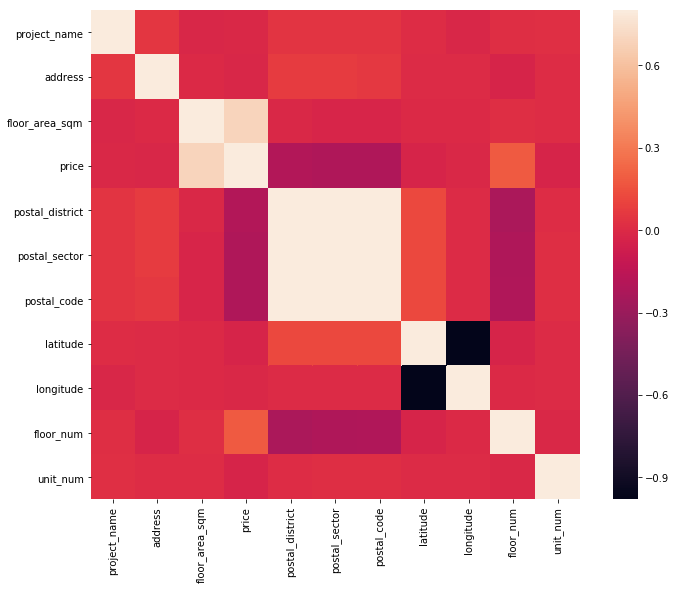

In [19]:
corrmat = train_data_pri.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()